# Geometry matters


When we occupy KNN there is one thing that changes the results and that is that the algorithm is based on **distance**, so the definition of distance itself matters.


## Minkowski distance


Minkowski distance is the generalized distance metric. Here generalized means that we can manipulate the above formula to calculate the distance between two data points in different ways.


$$d(x, y) = \left(\sum |x_i - y_i|^p \right)^{\frac{1}{p}}$$


## Euclidean Distance

Euclidean distance is one of the most used distance metrics.  It is calculated using the Minkowski Distance formula by setting p’s value to 2. This will update the distance d’ formula as below


$$d(x, y) = \sqrt{\sum (x_i - y_i)^2}$$

Euclidean distance formula can be used to calculate the distance between two data points in a plane.


<img src = https://miro.medium.com/max/173/0*zoty_Iv6Im-PBDvw.png>


## Manhattan Distance:


We use Manhattan Distance if we need to calculate the distance between two data points in a grid-like path. As mentioned above, we use the Minkowski distance formula to find Manhattan distance by setting p’s value as 1.

Distance d will be calculated using an absolute sum of the difference between its cartesian coordinates as below :

$$d(x, y) = \sum |x_i - y_i|$$


<img src = https://miro.medium.com/max/200/0*WH9xVZc-T9IsfH6a.png>

## Hierarchical clustering

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Hierarchical clustering groups together the data points with similar characteristics. Before implementing hierarchical clustering using Scikit-Learn, let's first understand the theory behind hierarchical clustering.




### Theory of Hierarchical Clustering

There are two types of hierarchical clustering: **Agglomerative** and **Divisive**. In the first, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.



### Steps to Perform Hierarchical Clustering

Following are the steps involved in agglomerative clustering:

- At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be $K$, while $K$ is an integer representing the number of data points.
- Form a cluster by joining the two closest data points resulting in $K-1$ clusters.
- Form more clusters by joining the two closest clusters resulting in $K-2$ clusters.
- Repeat the above three steps until one big cluster is formed.
- Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. 


<img src = http://cs.jhu.edu/~razvanm/fs-expedition/hclust-example.png>


There are different ways to find distance between the clusters. The distance itself can be Euclidean or Manhattan distance. Following are some of the options to measure distance between two clusters:

- Measure the distance between the closes points of two clusters.

$$
\begin{matrix}
d(C_m, C_n) = min(d(x_i, y_j)) & \forall & x_i \in C_m & and & y_j \in C_n\\
\end{matrix}
$$


- Measure the distance between the farthest points of two clusters.

$$
\begin{matrix}
d(C_m, C_n) = max(d(x_i, y_j)) & \forall & x_i \in C_m & and & y_j \in C_n\\
\end{matrix}
$$


- Measure the mean distance between the points of two clusters.

$$
\begin{matrix}
d(C_m, C_n) = mean(d(x_i, y_j)) & \forall & x_i \in C_m & and & y_j \in C_n\\
\end{matrix}
$$

- Measure the distance between the [centroids](#https://es.wikipedia.org/wiki/Centroide) of two clusters.


$$
\begin{matrix}
d(C_m, C_n) = mean(d(\overline{C_m}, \overline{C_n})) \\
\end{matrix}
$$


<img src = https://i0.wp.com/dataaspirant.com/wp-content/uploads/2018/01/Hierarchical-clustering-comparison.jpg>

### Role of Dendrograms for Hierarchical Clustering

We said that once one large cluster is formed by the combination of small clusters, dendrograms of the cluster are used to actually split the cluster into multiple clusters of related data points. Let's see how it's actually done.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from jupyterthemes import jtplot
%matplotlib inline

In [2]:
jtplot.style()

In [3]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

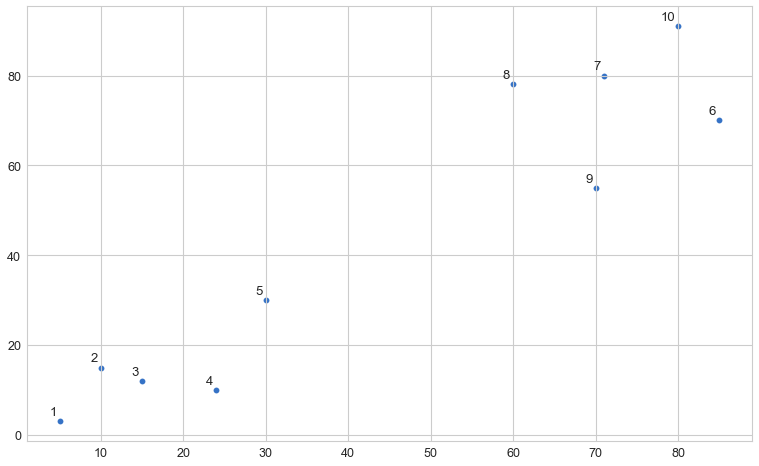

In [4]:
fig, ax = plt.subplots(figsize = (13, 8))
labels = range(1, 11)

ax.scatter(X[:,0], X[:,1], label = 'True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext = (-3, 3),
        textcoords ='offset points', ha = 'right', va = 'bottom')

Coming back to use of dendrograms in hierarchical clustering, let's draw the dendrograms for our data points. We will use the  `scipy` library for that purpose.

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

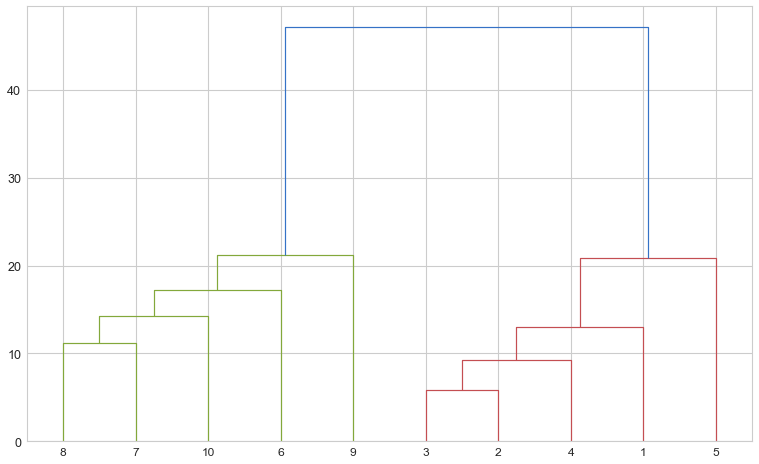

In [6]:
linked = linkage(X, 'single')

labelList = range(1, 11)


fig, ax = plt.subplots(figsize = (13, 8))

dendrogram(linked,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True);

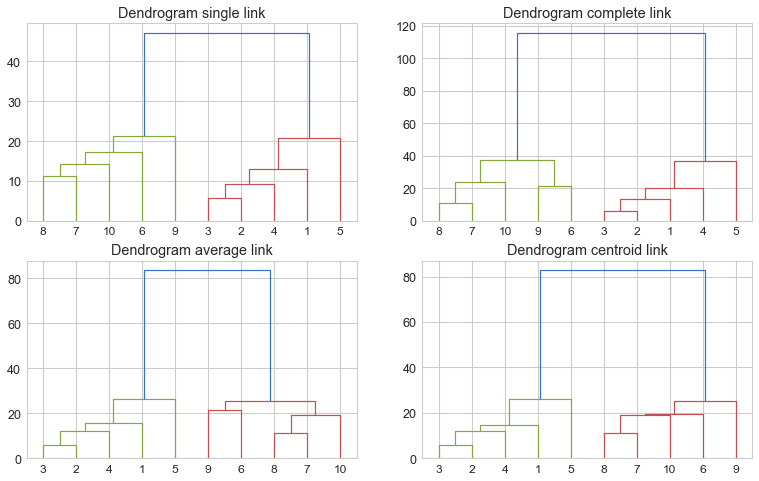

In [7]:
linked1 = linkage(X, 'single')
linked2 = linkage(X, 'complete')
linked3 = linkage(X, 'average')
linked4 = linkage(X, 'centroid')

labelList = range(1, 11)


fig, ax = plt.subplots(2, 2, figsize = (13, 8))

dendrogram(linked1,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True, ax = ax[0, 0])

ax[0, 0].set_title('Dendrogram single link')

dendrogram(linked2,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True, ax = ax[0, 1])

ax[0, 1].set_title('Dendrogram complete link')


dendrogram(linked3,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True, ax = ax[1, 0])

ax[1, 0].set_title('Dendrogram average link')


dendrogram(linked4,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True, ax = ax[1, 1])

ax[1, 1].set_title('Dendrogram centroid link');

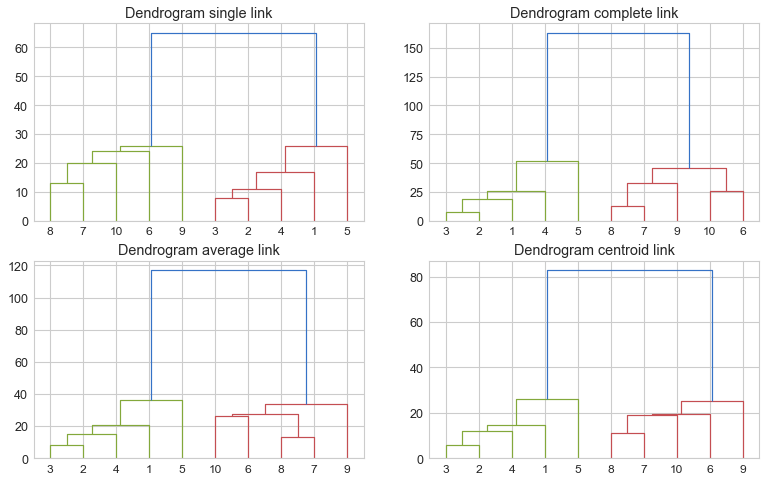

In [8]:
linked1 = linkage(X, 'single', metric = 'CityBlock')
linked2 = linkage(X, 'complete', metric = 'CityBlock')
linked3 = linkage(X, 'average', metric = 'CityBlock')
linked4 = linkage(X, 'centroid') #Method 'centroid' requires the distance metric to be Euclidean

labelList = range(1, 11)


fig, ax = plt.subplots(2, 2, figsize = (13, 8))

dendrogram(linked1,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True, ax = ax[0, 0])

ax[0, 0].set_title('Dendrogram single link')

dendrogram(linked2,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True, ax = ax[0, 1])

ax[0, 1].set_title('Dendrogram complete link')


dendrogram(linked3,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True, ax = ax[1, 0])

ax[1, 0].set_title('Dendrogram average link')


dendrogram(linked4,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True, ax = ax[1, 1])

ax[1, 1].set_title('Dendrogram centroid link');

Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters.

In [9]:
linked = linkage(X, 'single')

In [10]:
type(linked)

numpy.ndarray

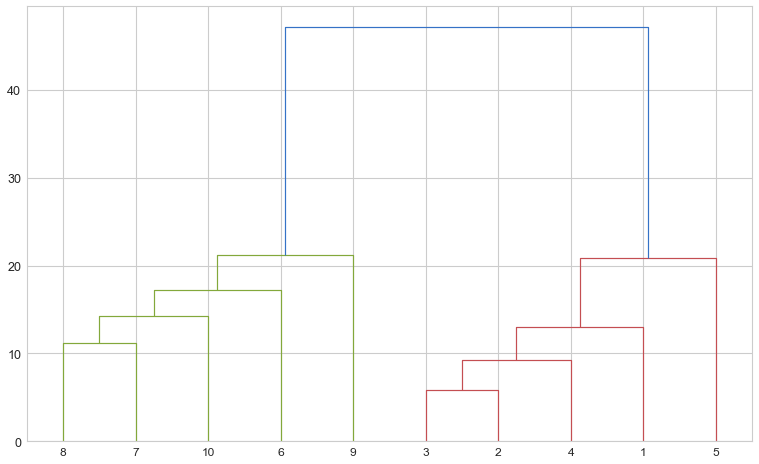

In [11]:
linked = linkage(X, 'single')

labelList = range(1, 11)


fig, ax = plt.subplots(figsize = (13, 8))

dendrogram(linked,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True);

In [12]:
linked

array([[ 1.        ,  2.        ,  5.83095189,  2.        ],
       [ 3.        , 10.        ,  9.21954446,  3.        ],
       [ 6.        ,  7.        , 11.18033989,  2.        ],
       [ 0.        , 11.        , 13.        ,  4.        ],
       [ 9.        , 12.        , 14.2126704 ,  3.        ],
       [ 5.        , 14.        , 17.20465053,  4.        ],
       [ 4.        , 13.        , 20.88061302,  5.        ],
       [ 8.        , 15.        , 21.21320344,  5.        ],
       [16.        , 17.        , 47.16990566, 10.        ]])

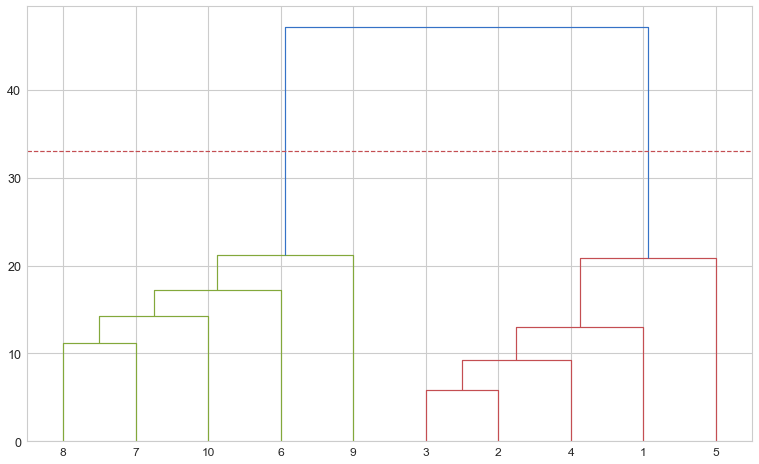

In [13]:
labelList = range(1, 11)


fig, ax = plt.subplots(figsize = (13, 8))

dendrogram(linked,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True, ax = ax, color_threshold = 0.7 * linked[-1, 2])
ax.axhline(0.7 * linked[-1, 2], color = 'r', linestyle = '--');

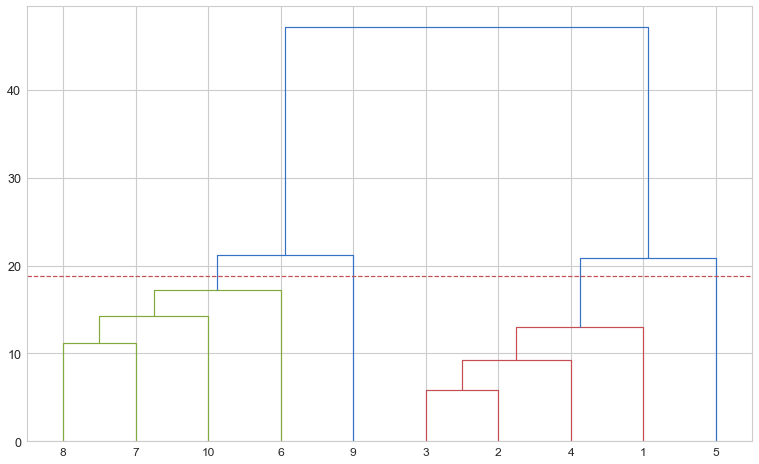

In [14]:
labelList = range(1, 11)


fig, ax = plt.subplots(figsize = (13, 8))

dendrogram(linked,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True, ax = ax, color_threshold = 0.4 * linked[-1, 2])
ax.axhline(0.4 * linked[-1, 2], color = 'r', linestyle = '--');

**Ejercicio**

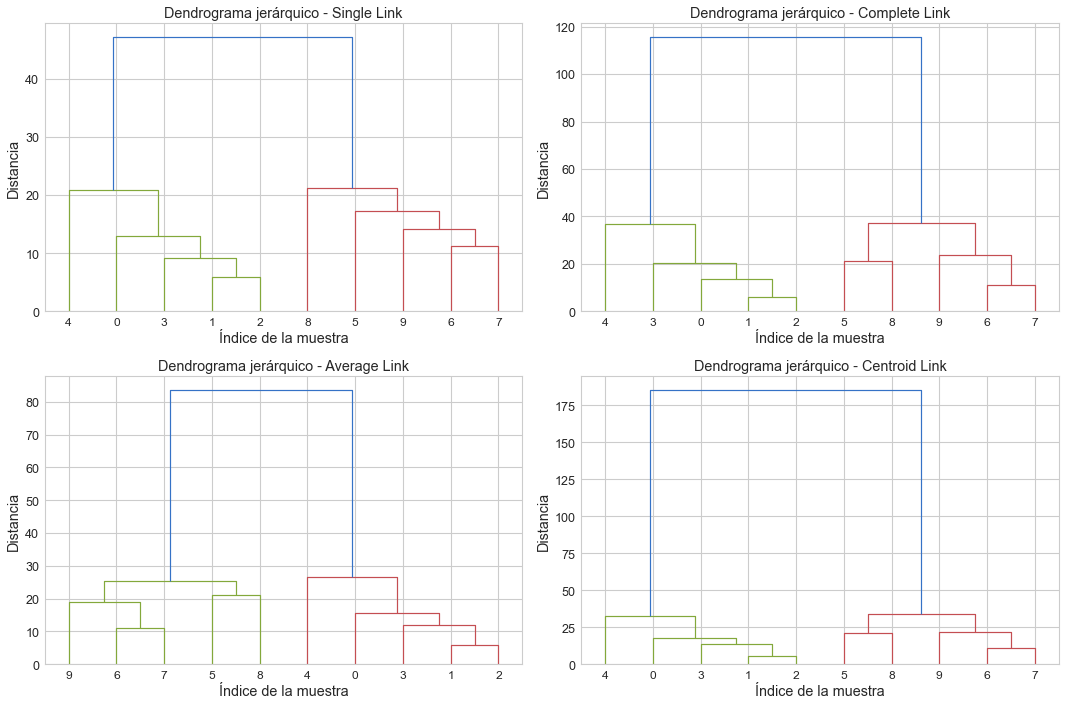

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generar datos de ejemplo
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

# Definir los modelos de clustering jerárquico con diferentes distancias de enlace
modelos = {
    'Single Link': 'single',
    'Complete Link': 'complete',
    'Average Link': 'average',
    'Centroid Link': 'ward'
}

# Función para dibujar el dendrograma
def plot_dendrogram(X, modelo, **kwargs):
    # Calcular la matriz de enlace
    enlace = linkage(X, method=modelo)
    # Graficar el dendrograma
    dendrogram(enlace, **kwargs)

# Graficar los dendrogramas
plt.figure(figsize=(15, 10))
for i, (nombre, metodo) in enumerate(modelos.items()):
    plt.subplot(2, 2, i + 1)
    plt.title(f'Dendrograma jerárquico - {nombre}')
    plot_dendrogram(X, metodo)
    plt.xlabel("Índice de la muestra")
    plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

### Elbow method


In cluster analysis, the elbow method is used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. 

In [16]:
linked

array([[ 1.        ,  2.        ,  5.83095189,  2.        ],
       [ 3.        , 10.        ,  9.21954446,  3.        ],
       [ 6.        ,  7.        , 11.18033989,  2.        ],
       [ 0.        , 11.        , 13.        ,  4.        ],
       [ 9.        , 12.        , 14.2126704 ,  3.        ],
       [ 5.        , 14.        , 17.20465053,  4.        ],
       [ 4.        , 13.        , 20.88061302,  5.        ],
       [ 8.        , 15.        , 21.21320344,  5.        ],
       [16.        , 17.        , 47.16990566, 10.        ]])

In [17]:
distances = linked[:, 2][::-1]
distances

array([47.16990566, 21.21320344, 20.88061302, 17.20465053, 14.2126704 ,
       13.        , 11.18033989,  9.21954446,  5.83095189])

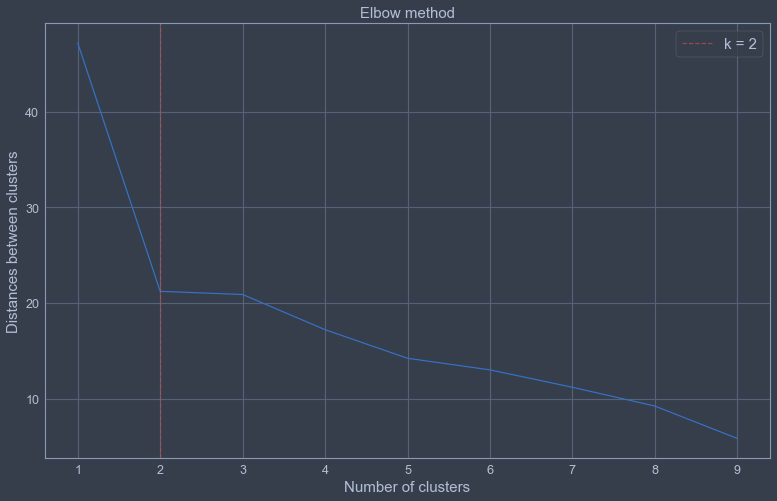

In [18]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.plot(np.arange(1, len(distances) + 1), distances)
ax.set_title('Elbow method', fontsize = 15)
ax.set_xlabel('Number of clusters', fontsize = 15)
ax.set_ylabel('Distances between clusters', fontsize = 15)
ax.axvline(2, color = 'r', alpha = 0.7, linestyle = '--', label = 'k = 2')
ax.legend(prop = {'size' : 15});

## Hierarchical Clustering via Scikit-Learn

In [19]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

In [20]:
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
cluster.labels_

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
df = pd.DataFrame({'X' : X[:, 0], 'Y' : X[:, 1], 'Cluster' : cluster.labels_})
df


,X,Y,Cluster
0,5,3,1
1,10,15,1
2,15,12,1
3,24,10,1
4,30,30,1
5,85,70,0
6,71,80,0
7,60,78,0
8,70,55,0
9,80,91,0


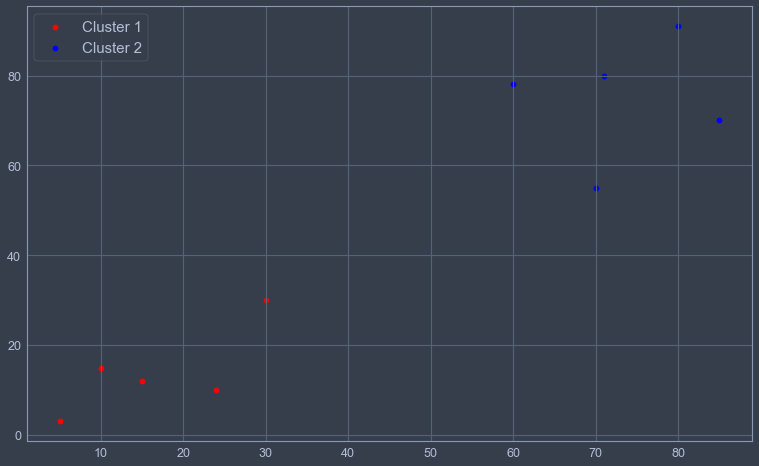

In [24]:
fig, ax = plt.subplots(figsize = (13, 8))


ax.scatter(df[df['Cluster'] == 1]['X'], df[df['Cluster'] == 1]['Y'], c = 'red', label = 'Cluster 1')
ax.scatter(df[df['Cluster'] == 0]['X'], df[df['Cluster'] == 0]['Y'], c = 'blue', label = 'Cluster 2')
ax.legend(prop = {'size' : 15});

**Example 2**

The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.

In [25]:
customer_data = pd.read_csv('shopping-data.csv')

In [26]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
customer_data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [28]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. 

- The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [29]:
data = customer_data.iloc[:, 3:5]

In [30]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [31]:
data.shape

(200, 2)

$$d(u,v) = \sqrt{\frac{|v|+|s|}
                           {T}d(v,s)^2
                    + \frac{|v|+|t|}
                           {T}d(v,t)^2
                    - \frac{|v|}
                           {T}d(s,t)^2}$$

In [32]:
linked = linkage(data, 'ward')

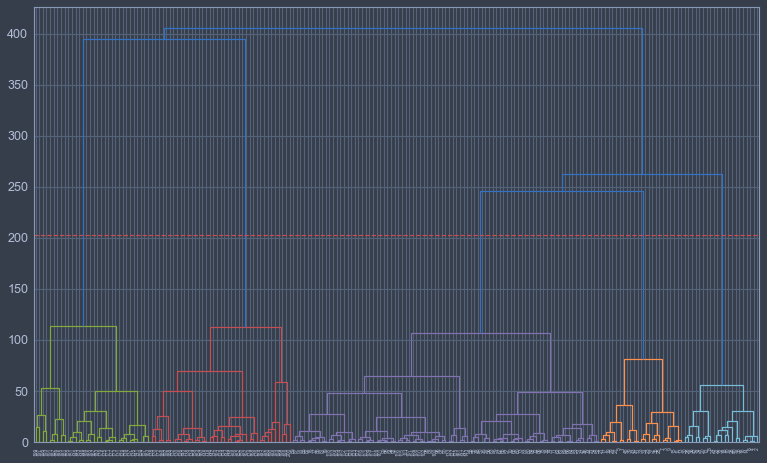

In [37]:
labelList = range(1, data.shape[0] + 1)
fig, ax = plt.subplots(figsize = (13, 8))

dendrogram(linked,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True, ax = ax, color_threshold = 0.5 * linked[-1, 2])
ax.axhline(0.5 * linked[-1, 2], color = 'r', linestyle = '--');

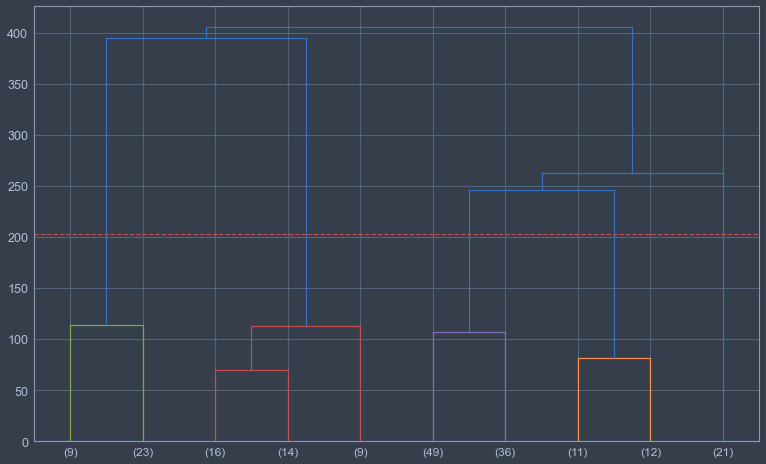

In [40]:
labelList = range(1, data.shape[0] + 1)
fig, ax = plt.subplots(figsize = (13, 8))

dendrogram(linked,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True, ax = ax,
          truncate_mode = 'lastp', p = 10, color_threshold = 0.5 * linked[-1, 2])
ax.axhline(0.5 * linked[-1, 2], color = 'r', linestyle = '--');

In [38]:
distances = linked[:, 2][::-1]

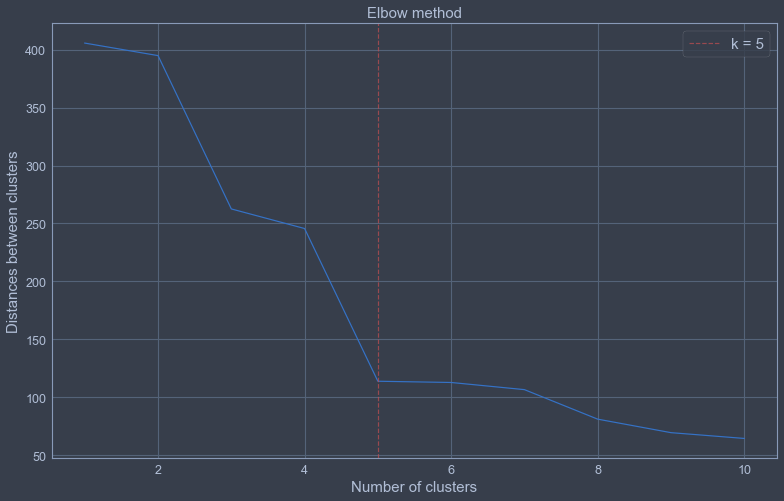

In [39]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.plot(np.arange(1, 11), distances[:10])
ax.set_title('Elbow method', fontsize = 15)
ax.set_xlabel('Number of clusters', fontsize = 15)
ax.set_ylabel('Distances between clusters', fontsize = 15)
ax.axvline(5, color = 'r', alpha = 0.7, linestyle = '--', label = 'k = 5')
ax.legend(prop = {'size' : 15});

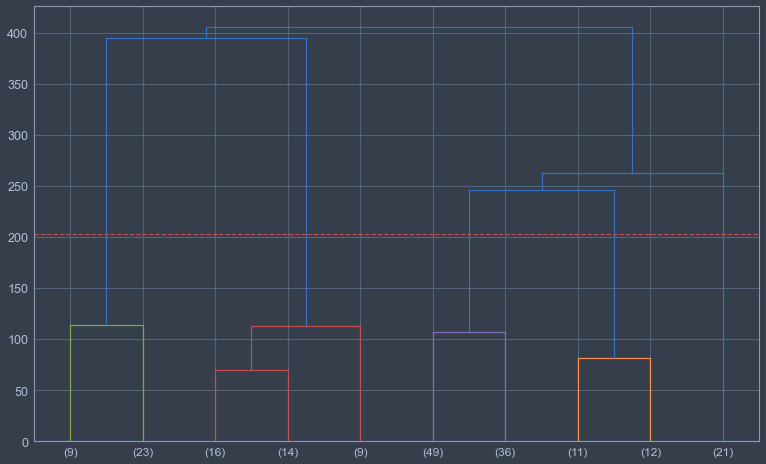

In [41]:
labelList = range(1, data.shape[0] + 1)
fig, ax = plt.subplots(figsize = (13, 8))

dendrogram(linked,
            orientation = 'top',
            labels = labelList,
            distance_sort = 'descending',
            show_leaf_counts = True, ax = ax,
          truncate_mode = 'lastp', p = 10, color_threshold = 0.5 * linked[-1, 2])
ax.axhline(0.5 * linked[-1, 2], color = 'r', linestyle = '--');

In [42]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [43]:
data['Cluster'] = cluster.labels_
data.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [44]:
customer_data['Cluster'] = cluster.labels_

In [45]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


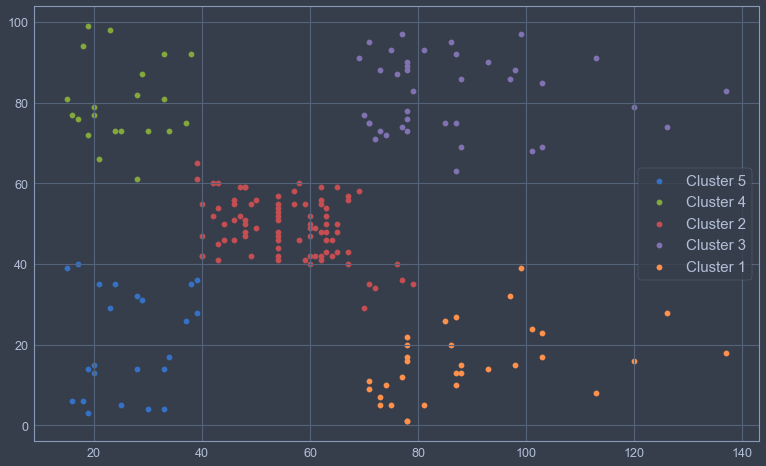

In [46]:
fig, ax = plt.subplots(figsize = (13, 8))

for c in data['Cluster'].unique():
    ax.scatter(data[data['Cluster'] == c]['Annual Income (k$)'], 
               data[data['Cluster'] == c]['Spending Score (1-100)'], label = 'Cluster {}'.format(c + 1))
ax.legend(prop = {'size' : 15});

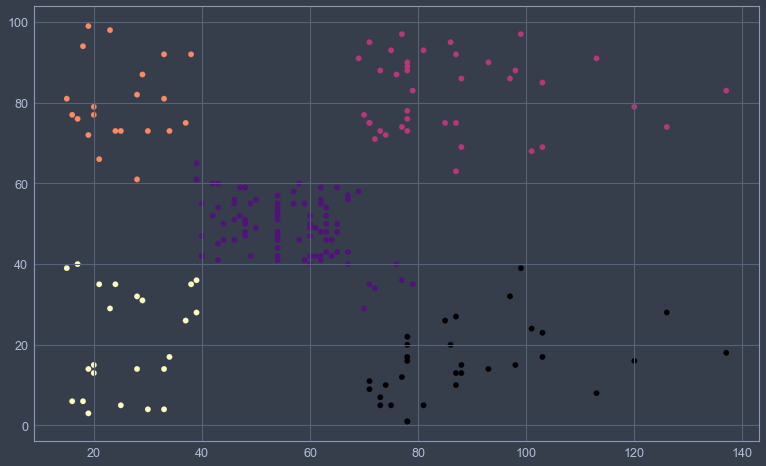

In [47]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = cluster.labels_, cmap = 'magma');

You can see the data points in the form of five clusters. 

- The data points in the bottom right belong to the customers with high salaries but low spending. These are the customers that spend their money carefully.  
- The customers at top right, these are the customers with high salaries and high spending. These are the type of customers that companies target. 
- The customers in the middle are the ones with average income and average salaries. 

    - The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers.

## A nice example


### Problem Statement
[HELP International](https://help-international.org) is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 
After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  



In [48]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [49]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [50]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [51]:
des = pd.read_csv('data-dictionary.csv')
des

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services. Given as %age o...
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age o...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [52]:
#checking duplicates
data.duplicated(subset = 'country').sum() == 0
# No duplicate values

True

In [53]:
data.shape

(167, 10)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [55]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Data Cleaning

In [56]:
data.isnull().sum() # No NULL values are observed.

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Exploratory Data Analytics

We will have a look on the lowest 10 countries for each factor.

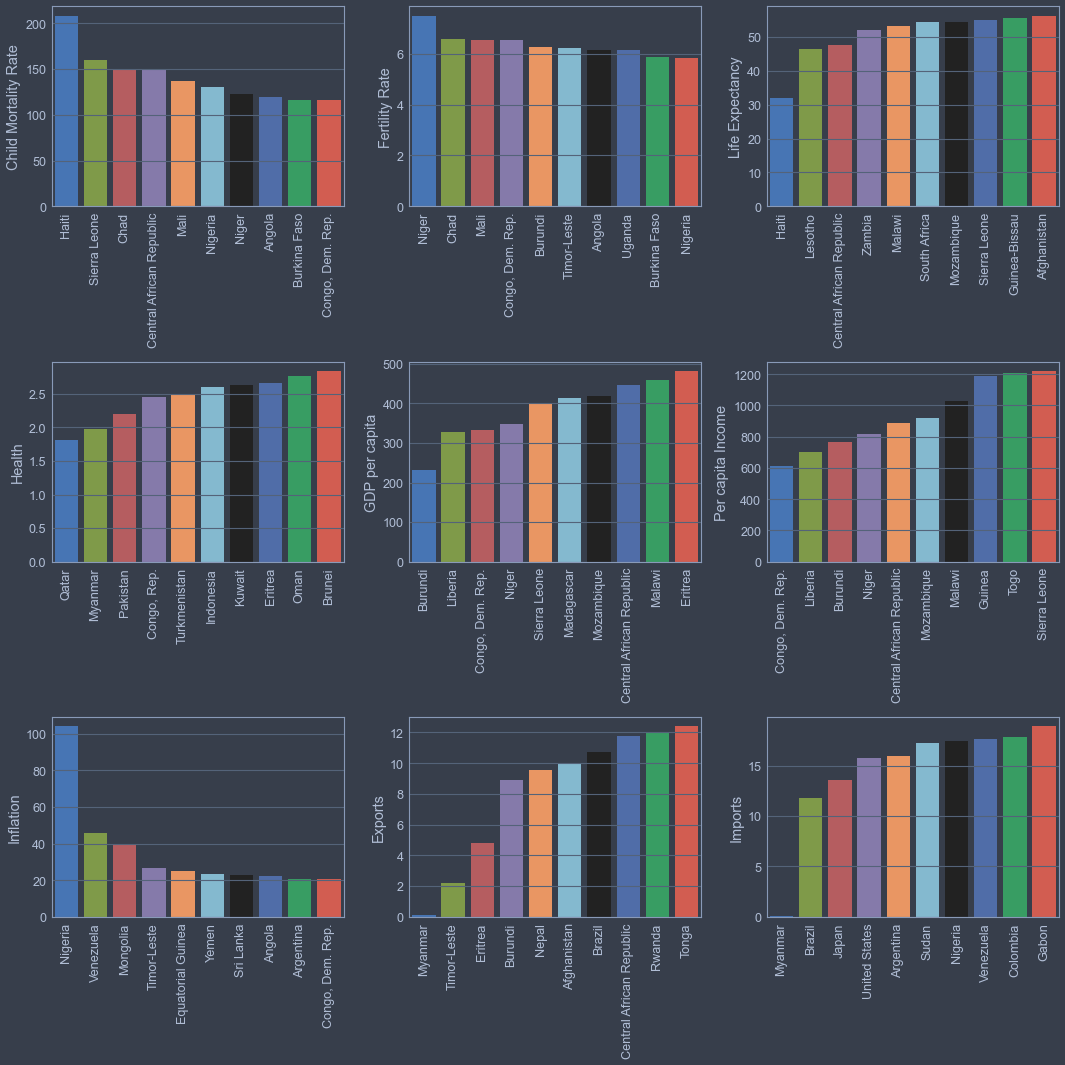

In [57]:
fig, axs = plt.subplots(3, 3, figsize = (15, 15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
top10_child_mort = data[['country', 'child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x ='country', y ='child_mort', data = top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel = 'Child Mortality Rate')


# Fertility Rate: The number of children that would be born to each woman if 
# the current age-fertility rates remain the same
top10_total_fer = data[['country', 'total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x ='country', y ='total_fer', data = top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel = 'Fertility Rate')


# Life Expectancy: The average number of years a new born child would live if 
# the current mortality patterns are to remain same
bottom10_life_expec = data[['country', 'life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x ='country', y ='life_expec', data = bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel = 'Life Expectancy')


# Health :Total health spending as %age of Total GDP.
bottom10_health = data[['country', 'health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x ='country', y ='health', data = bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel = 'Health')


# The GDP per capita : Calculated as the Total GDP divided by the total population.
bottom10_gdpp = data[['country', 'gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x ='country', y ='gdpp', data = bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel = 'GDP per capita')


# Per capita Income : Net income per person
bottom10_income = data[['country', 'income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x ='country', y ='income', data = bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel = 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP
top10_inflation = data[['country', 'inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x ='country', y ='inflation', data = top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel = 'Inflation')



# Exports: Exports of goods and services. Given as %age of the Total GDP
bottom10_exports = data[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x ='country', y ='exports', data = bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel = 'Exports')



# Imports: Imports of goods and services. Given as %age of the Total GDP
bottom10_imports = data[['country', 'imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x ='country', y = 'imports', data = bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel = 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout();

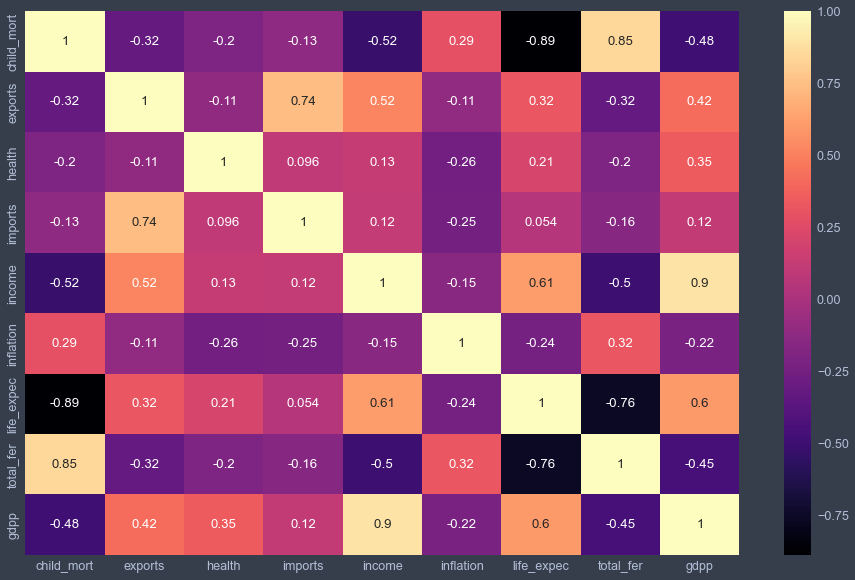

In [58]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap = "magma");

We can see there is high correlation between some variables, we will use PCA to solve this issue.

## Outlier Analysis

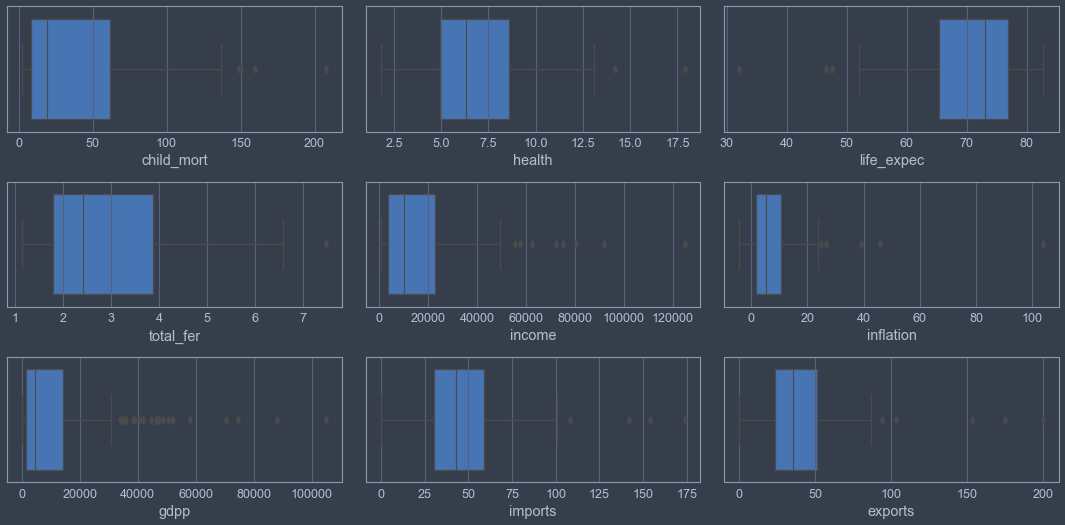

In [59]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data['health'], ax = axs[0,1])
plt3 = sns.boxplot(data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data['income'], ax = axs[1,1])
plt6 = sns.boxplot(data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data['exports'], ax = axs[2,2])


plt.tight_layout()

In [60]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [61]:
data_help = data.copy()
data_help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [62]:
import aztlan as az

In [63]:
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

In [65]:
outliers = az.Outliers()

In [66]:
data_help.loc[:, varlist] = outliers.fit(data_help[varlist], verbose = True, how = 'iqr', impute = 'extremes')[0]

4 outliers were found
5 outliers were found
2 outliers were found
4 outliers were found
8 outliers were found
5 outliers were found
3 outliers were found
1 outliers were found
25 outliers were found


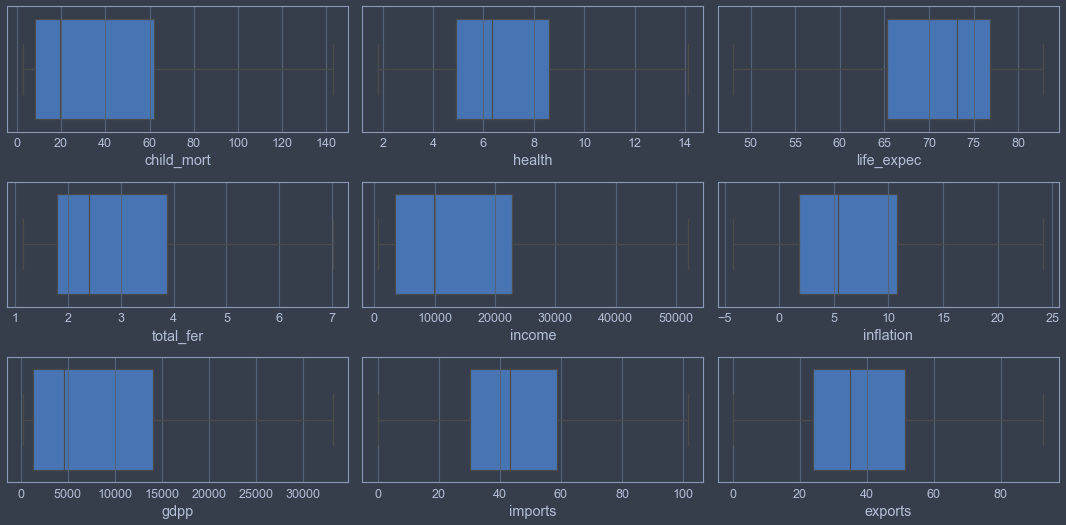

In [67]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(data_help['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data_help['health'], ax = axs[0,1])
plt3 = sns.boxplot(data_help['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data_help['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data_help['income'], ax = axs[1,1])
plt6 = sns.boxplot(data_help['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data_help['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data_help['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data_help['exports'], ax = axs[2,2])


plt.tight_layout()

### Scaling the data

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
data_help[varlist] = scaler.fit_transform(data_help[varlist])

In [70]:
data_help.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-3.058099e-17,1.378638e-16,1.532374e-16,1.349553e-16,-2.858658e-17,-9.307259e-18,8.934969e-16,3.603239e-16,1.396089e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-9.157322e-01,-1.856841e+00,-1.873076e+00,-2.258436e+00,-1.009958e+00,-1.686656e+00,-2.661389e+00,-1.195879e+00,-8.741543e-01
25%,-7.683205e-01,-7.413112e-01,-7.039485e-01,-7.723742e-01,-8.288423e-01,-7.861142e-01,-6.312563e-01,-7.661802e-01,-7.792265e-01
50%,-4.800197e-01,-2.139408e-01,-1.776529e-01,-1.263484e-01,-3.932023e-01,-2.505759e-01,2.867169e-01,-3.564670e-01,-4.915929e-01
75%,6.366568e-01,5.559257e-01,6.794570e-01,6.355675e-01,4.536741e-01,5.512355e-01,7.221657e-01,6.228474e-01,3.194823e-01
max,2.744123e+00,2.501781e+00,2.754565e+00,2.747480e+00,2.377449e+00,2.557260e+00,1.428299e+00,2.706389e+00,1.967546e+00


## PCA on the Data

[PCA in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [71]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 42)

In [72]:
# Putting feature variable to X
X = data_help.drop(['country'],axis=1)

# Putting response variable to y
y = data_help['country']

In [73]:
#Doing the PCA on the train data
pca.fit(X)

PCA(random_state=42, svd_solver='randomized')

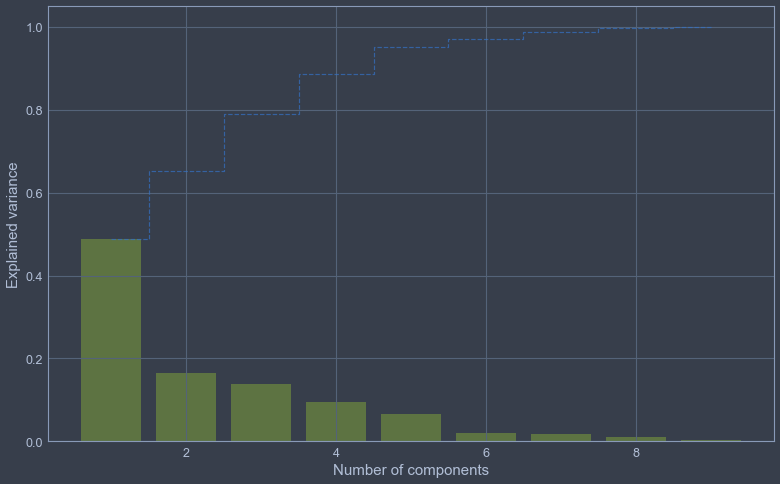

In [74]:
fig, ax = plt.subplots(figsize = (13, 8))
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

ax.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center',
        label='Explained variance ratio', color='g')
ax.step(range(1, len(pca.explained_variance_ratio_) + 1), cum_var_exp, where='mid', color = 'b', alpha = 0.7,
        linestyle='--', label='Cumulative Explained variance ratio')

ax.set_xlabel('Number of components', fontsize = 15)
ax.set_ylabel('Explained variance', fontsize = 15);

#### Looks like 5 components are enough to describe 95% of the variance in the dataset
We'll choose 5 components for our modeling


In [75]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 5)

In [76]:
df_pca = pca_final.fit_transform(X)
df_pca.shape

(167, 5)

In [77]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4
0,-3.177710,-0.251717,1.012465,0.778252,-0.019275
1,0.434936,-0.218673,0.293355,-1.391516,0.153447
2,-0.416816,-0.612987,-1.637990,-0.615371,0.540217
3,-3.306485,1.067652,-2.150695,1.698928,0.167330
4,1.253325,0.547657,0.137853,-0.717170,-0.396180


#### Creating correlation matrix for the principal components - we expect little to no correlation

In [78]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

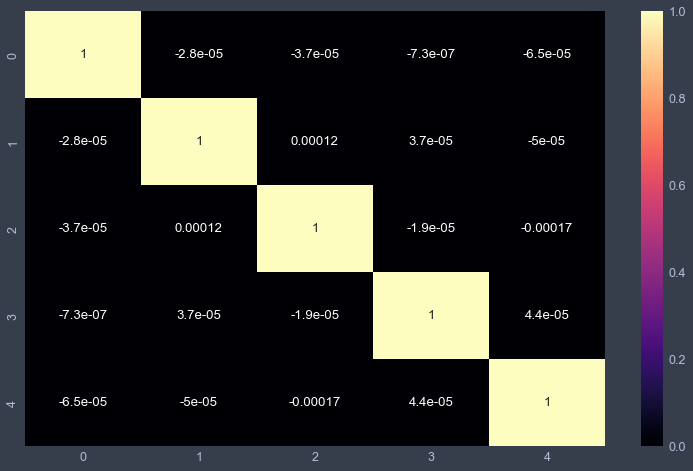

In [79]:
#plotting the correlation matrix
fig, ax = plt.subplots(figsize = (13, 8))
sns.heatmap(corrmat,annot = True, cmap = "magma", ax = ax);

## Hierarchical clustering

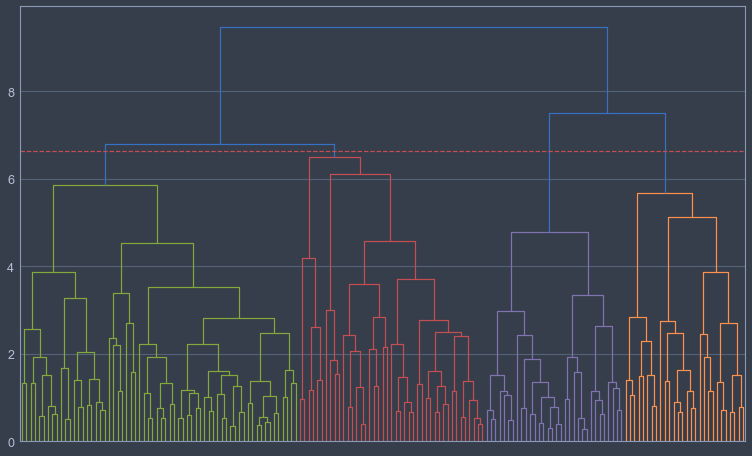

In [80]:
mergings = linkage(df_pca, method = "complete", metric = 'euclidean')
fig, ax = plt.subplots(figsize = (13, 8))

dendrogram(mergings, ax = ax, color_threshold = 0.7 * mergings[-1, 2])
ax.axhline(0.7 * mergings[-1, 2], color = 'r', linestyle = '--')
ax.set_xticks([]);

In [ ]:
# Looking at the dedrogram it is observed that cutting it at n = 4 is most optimum.

In [81]:
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
cluster.fit_predict(df_pca)

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 3, 1, 2, 1, 3, 1, 0, 1, 1, 2, 1,
       2, 3, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 3, 3,
       2, 1, 1, 1, 1, 0, 1, 3, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 3, 2, 1, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 0, 0, 3, 1, 0, 1, 1, 0,
       0, 3, 3, 3, 1, 0, 0, 3, 3, 0, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       3, 2, 0, 0, 2, 3, 1, 3, 1, 1, 1, 2, 2, 3, 1, 1, 0, 1, 3, 0, 2, 3,
       0, 3, 3, 3, 1, 0, 3, 2, 1, 1, 0, 1, 2, 3, 1, 0, 3, 0, 0, 1, 1, 2,
       1, 0, 1, 3, 2, 2, 2, 1, 1, 1, 1, 0, 0], dtype=int64)

In [82]:
clusters = pd.Series(cluster.labels_)
df_pca_hc = pd.concat([df_pca, clusters], axis = 1)
df_pca_hc.columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-3.177710,-0.251717,1.012465,0.778252,-0.019275,0
1,0.434936,-0.218673,0.293355,-1.391516,0.153447,1
2,-0.416816,-0.612987,-1.637990,-0.615371,0.540217,1
3,-3.306485,1.067652,-2.150695,1.698928,0.167330,0
4,1.253325,0.547657,0.137853,-0.717170,-0.396180,1


In [83]:
df_pca_hc["ClusterID"].value_counts()

1    64
0    43
2    32
3    28
Name: ClusterID, dtype: int64

In [84]:
pca_cluster_hc = pd.concat([y, df_pca_hc], axis = 1)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,-3.177710,-0.251717,1.012465,0.778252,-0.019275,0
1,Albania,0.434936,-0.218673,0.293355,-1.391516,0.153447,1
2,Algeria,-0.416816,-0.612987,-1.637990,-0.615371,0.540217,1
3,Angola,-3.306485,1.067652,-2.150695,1.698928,0.167330,0
4,Antigua and Barbuda,1.253325,0.547657,0.137853,-0.717170,-0.396180,1


In [85]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(data, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [86]:
hc_clusters_child_mort = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"])['child_mort'].mean())
hc_clusters_exports    = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"])['exports'].mean())
hc_clusters_health     = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"])['health'].mean())
hc_clusters_imports    = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"])['imports'].mean())
hc_clusters_income     = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"])['income'].mean())
hc_clusters_inflation  = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"])['inflation'].mean())
hc_clusters_life_expec = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"])['life_expec'].mean())
hc_clusters_total_fer  = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"])['total_fer'].mean())
hc_clusters_gdpp       = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"])['gdpp'].mean())

In [87]:
hc_clusters_child_mort

,child_mort
ClusterID,
0,95.732558
1,28.225000
2,7.456250
3,8.200000


In [88]:
df = pd.concat([pd.Series(list(range(0,4))), hc_clusters_child_mort, hc_clusters_exports,
                hc_clusters_health, hc_clusters_imports, hc_clusters_income, hc_clusters_inflation,
                hc_clusters_life_expec, hc_clusters_total_fer, hc_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,95.732558,28.942326,6.653721,43.753488,3452.860465,12.026628,59.006977,5.100930,1759.302326
1,1,28.225000,36.159047,5.693125,45.501030,9391.250000,8.784953,70.900000,2.552188,4450.062500
2,2,7.456250,31.731250,9.742188,33.531250,29389.062500,2.776156,79.040625,1.796875,30338.437500
3,3,8.200000,81.825000,6.285714,70.150000,41900.000000,4.690964,77.807143,1.861786,29776.071429


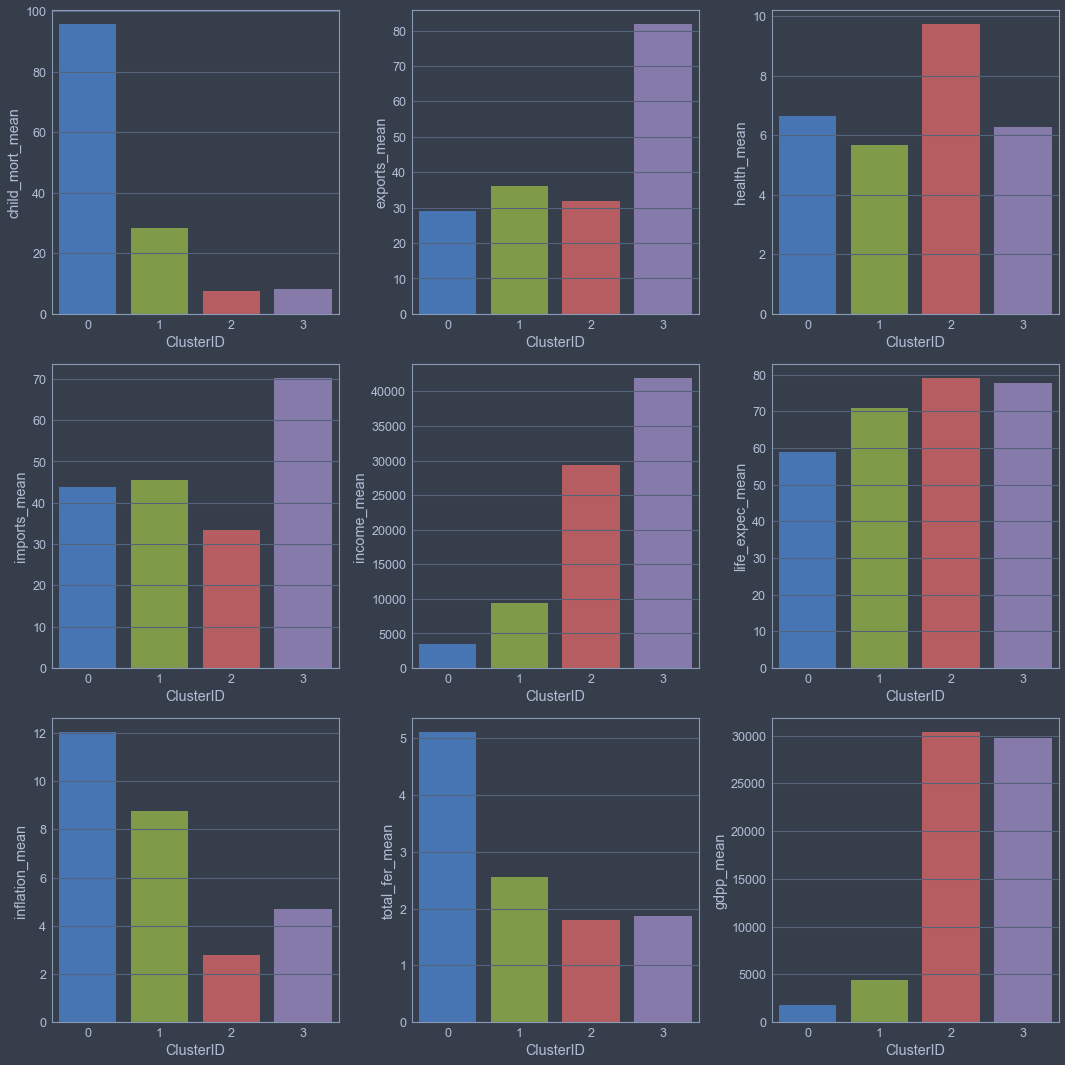

In [89]:
fig, axs = plt.subplots(3, 3, figsize = (15,15))

sns.barplot(x = df.ClusterID, y = df.child_mort_mean, ax = axs[0,0])
sns.barplot(x = df.ClusterID, y = df.exports_mean, ax = axs[0,1])
sns.barplot(x = df.ClusterID, y = df.health_mean, ax = axs[0,2])
sns.barplot(x = df.ClusterID, y = df.imports_mean, ax = axs[1,0])
sns.barplot(x = df.ClusterID, y = df.income_mean, ax = axs[1,1])
sns.barplot(x = df.ClusterID, y = df.life_expec_mean, ax = axs[1,2])
sns.barplot(x = df.ClusterID, y = df.inflation_mean, ax = axs[2,0])
sns.barplot(x = df.ClusterID, y = df.total_fer_mean, ax = axs[2,1])
sns.barplot(x = df.ClusterID, y = df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

In [93]:
clustered_data_hc[clustered_data_hc.ClusterID == 1].country.values

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize',
       'Bhutan', 'Bolivia', 'Botswana', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'China', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Fiji', 'Grenada', 'Guatemala', 'Guyana',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon',
       'Macedonia, FYR', 'Mauritius', 'Moldova', 'Mongolia', 'Montenegro',
       'Morocco', 'Myanmar', 'Namibia', 'Nepal', 'Pakistan', 'Paraguay',
       'Peru', 'Philippines', 'Romania', 'Russia', 'Samoa',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', 'Tonga', 'Tunisia', 'Turkmenistan',
       'Ukraine', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam'],
      dtype=object)

### Recommendations
1. Cluster with ClusterID as 0, is the cluster of most backward country.
2. Countries on which we require to focus more are

|Country|Country|Country|Country|Country|
|:-----:|:-----:|:-----:|:-----:|:-----:|
|Afghanistan|Angola|Benin|Burkina Faso|Burundi|
|Cameroon|Central African Republic|Chad|Comoros|Congo, Dem. Rep.|
|Congo, Rep.|Cote d'Ivoire|Equatorial Guinea|Gabon|Gambia|
|Ghana|Guinea|Guinea-Bissau|Haiti|Kenya|
|Kiribati|Lao|Lesotho|Liberia|Madagascar|
|Malawi|Mali|Mauritania|Micronesia, Fed. Sts|Mozambique|
|Niger|Nigeria|Rwanda|Senegal|Sierra Leone|
|South Africa|Sudan|Tanzania|Timor-Leste|Togo|
|Uganda|Yemen|Zambia|||
       
       



In [ ]:
import plotly
import plotly.express as px

In [ ]:
fig = px.choropleth(clustered_data_hc, locations = 'country', color = 'Cluster ID')

In [ ]:
fig

In [ ]:
data['country'].values